<a href="https://colab.research.google.com/github/parisairam/learning/blob/master/Loan_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_ctrUa4K.csv to train_ctrUa4K.csv
Saving test_lAUu6dG.csv to test_lAUu6dG.csv


In [ ]:
import pandas as pd
import io

train = pd.read_csv(io.BytesIO(uploaded['train_ctrUa4K.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test_lAUu6dG.csv']))

In [ ]:
import sweetviz

ModuleNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
train.set_index('Loan_ID',inplace=True)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.set_index('Loan_ID',inplace=True)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train['Credit_History']=train['Credit_History'].astype(str)
test['Credit_History']=test['Credit_History'].astype(str)
train.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 62.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  D

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


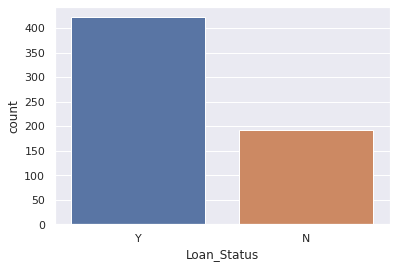

In [ ]:
sns.countplot(x='Loan_Status',data=train)

In [ ]:
train.drop(['ApplicantIncome',	'CoapplicantIncome'	,'LoanAmount'],inplace=True,axis=1)
test.drop(['ApplicantIncome',	'CoapplicantIncome'	,'LoanAmount'],inplace=True,axis=1)

In [ ]:
train_df_encoded = pd.get_dummies(train,drop_first=True)
test_df_encoded = pd.get_dummies(test,drop_first=True)
train_df_encoded.head()

,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_nan,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,
LP001002,360.0,1,0,0,0,0,0,0,1,0,0,1,1
LP001003,360.0,1,1,1,0,0,0,0,1,0,0,0,0
LP001005,360.0,1,1,0,0,0,0,1,1,0,0,1,1
LP001006,360.0,1,1,0,0,0,1,0,1,0,0,1,1
LP001008,360.0,1,0,0,0,0,0,0,1,0,0,1,1


In [ ]:
X=train_df_encoded.drop('Loan_Status_Y',axis=1)
Y=train_df_encoded.Loan_Status_Y
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2,random_state=0, stratify = Y)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_valid)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_predict = svc_model.predict(X_test_imp)

In [ ]:
svc_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
cm=confusion_matrix(y_valid,svc_predict)

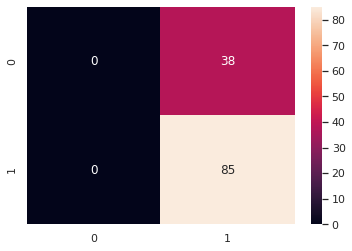

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_valid_scaled = sc.fit_transform(X_test_imp)

In [ ]:
svc_model.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_predict=svc_model.predict(X_valid_scaled)

In [ ]:
cm=confusion_matrix(y_valid,svc_predict)

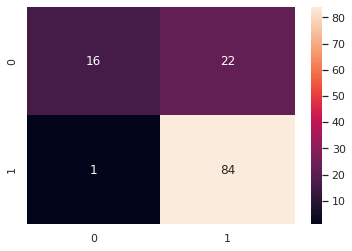

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
param_grid = {'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,10,20,30,40,50], 'gamma': [0.001,0.01,0.1,0.8,0.9,1,1.1,1.2,1.3,1.4], 'kernel': ['linear','rbf']}

from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose= 4)

In [ ]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.778, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.816, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.765, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.878, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.806, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.8, kernel=linear, score=0.778, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.8, kernel=linear, score=0.816, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.8, kernel=linear, score=0.765, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.8, kernel=linear, score=0.878, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 1300 out of 1300 | elapsed:   12.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 10, 20, 30,
                               40, 50],
                         'gamma': [0.001, 0.01, 0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3,
                                   1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
grid_prediction = grid.predict(X_valid_scaled)

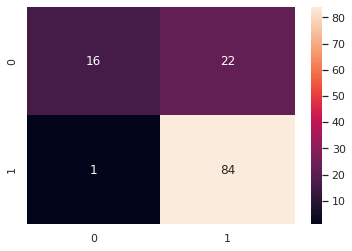

In [ ]:
cm = confusion_matrix(y_valid,grid_prediction)
sns.heatmap(cm,annot=True)

In [ ]:
test_scaled = sc.fit_transform(test)

ValueError: ignored

In [ ]:
test_predict = grid.predict(test_scaled)

In [ ]:
test['Loan_Status']=test_predict

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1,2,Y
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1,2,Y
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1,2,Y
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,2,2,Y
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1,2,Y


In [ ]:
test.reset_index(inplace=True)

In [ ]:
test.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1,2,Y
1,1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1,2,Y
2,2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1,2,Y
3,3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,2,2,Y
4,4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1,2,Y


In [ ]:
result = test[['Loan_ID','Loan_Status']]

In [ ]:
from google.colab import  drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
result.to_csv('/drive/My Drive/Results/Loan_prediction_svm_submission3.csv')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model= RandomForestClassifier(n_estimators=1000)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_predicted = rf_model.predict(X_valid)

In [ ]:
cm=confusion_matrix(y_valid,rf_predicted)

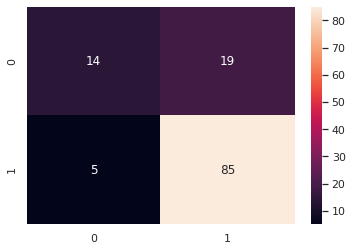

In [ ]:
sns.heatmap(cm,annot=True)

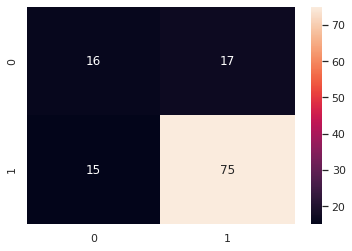

In [ ]:
rf_model.fit(X_train_scaled,y_train)
rf_predicted = rf_model.predict(X_valid_scaled)
cm=confusion_matrix(y_valid,rf_predicted)
sns.heatmap(cm,annot=True)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_search=RandomizedSearchCV(RandomForestClassifier(),random_grid,n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, refit=True)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 800}

In [ ]:
model_rf_new=RandomForestClassifier(n_estimators=800,max_depth=90,min_samples_leaf=4,min_samples_split=2,max_features='sqrt',bootstrap=True)

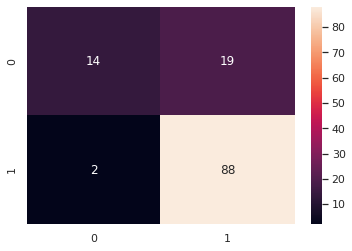

In [ ]:
model_rf_new.fit(X_train,y_train)
rs_prediction = model_rf_new.predict(X_valid)
cm=confusion_matrix(y_valid,rs_prediction)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rt2_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

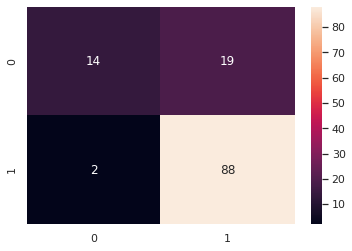

In [ ]:
rt2_model.fit(X_train,y_train)
rt2_prediction = rt2_model.predict(X_valid)
cm=confusion_matrix(y_valid,rt2_prediction)
sns.heatmap(cm,annot=True)


In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(max_depth=10,min_child_weight = 14,gamma=4,subsample=0.95, colsample_bytree=0.95,nthread=4, scale_pos_weight=1, seed=27,reg_alpha= 1,learning_rate=0.3)

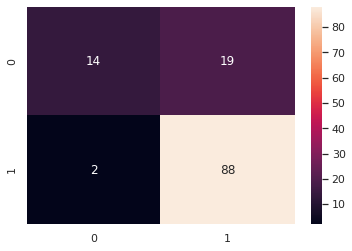

In [ ]:
xgb_model.fit(X_train,y_train)
xgb_prediction=xgb_model.predict(X_valid)
cm=confusion_matrix(y_valid,xgb_prediction)
sns.heatmap(cm,annot=True)

In [ ]:
test2 = test.drop('Loan_Status',axis=1)

In [ ]:
test2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0,110.0,360.0,1,2
LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1,2
LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1,2
LP001035,1,1,2,0,0,2340,2546,100.0,360.0,2,2
LP001051,1,0,0,1,0,3276,0,78.0,360.0,1,2


In [ ]:
test_prediction=xgb_model.predict(test2)

In [ ]:
test2['Loan_Status']=test_prediction

In [ ]:
test2.reset_index(inplace=True)

In [ ]:
result = test[['Loan_ID','Loan_Status']]

In [ ]:
result.to_csv('/drive/My Drive/Results/Loan_prediction_xgb_submission.csv')